### Contexto 

Uma empresa de Contact Center e Customer Experience contrata muitas pessoas por ano. Esse ramo de Contact Center é conhecido por ser a porta de entrada de muita gente no mercado, pois não exige muita experiência.

No entanto, o turnover por baixo desempenho dos colaboradores também é muito alto, fazendo com que a empresa tenha que ficar contratando e treinando pessoas constantemente para que a operação de atendimento não fique sem colaboradores e o cliente final não sinta uma demora para ser atendimento nos mais diversos canais de atendimento, desde o telefone até o chat e whatsapp.

A empresa gostaria de testar técnicas de People Analytics para ajudar o time de Atração de Talentos a filtrar melhor os perfis de colaboradores no processo seletivo a fim de trazer mais colaboradores com potencial de boa performance no trabalho. Para isso, os analistas de dados devem analisar um histórico de 7.240 colaboradores e sua performance após 6 meses a contração para responder:

 
Com base nessas informações, pede-se:
1. Quais fatores o time de Atração de Talentos deve olhar para selecionar candidatos com maior chance de ter boa performance após 6 meses à data da contratação?
2. Com base nisso, qual política de contratação deve passar a valer de forma que a empresa aumente as boas contratações?



### Carregamento de pacotes

In [2]:
#Manipulação dos dados 
import pandas as pd
import numpy as np

#Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9

#Analises
from sklearn import linear_model
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score, average_precision_score

# Módulo de Análise Exploratória
import aed
from ydata_profiling import ProfileReport

C:\Users\tania\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
C:\Users\tania\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.


### Carregamento banco de dados

In [16]:
dados=pd.read_excel("base_atendimento.xlsx", sheet_name=1)

### Ajuste do banco de dados

In [12]:
dados
#dados.dtypes
#dados.columns

,Id_Agente,Boa_Performance,"P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?",P 02: Qual área de atendimento você atua ou atuou por mais tempo?,P 03: Qual a sua escolaridade?,P 04: Qual seu conhecimento em inglês?,P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?,P 06: Você possui dependentes?,P 07: É bom trabalhar com meus colegas de trabalho.,P 08: Não tenho medo de criticar pessoas em cargos de liderança.,P 09: Fico tenso quando estou trabalhando.,P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.,P 11: Gosto de dizer o que penso.,P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.
5,6,1,Sim,Atendimento Receptivo,Ensino Médio completo,Básico,De 1h à 1h30,Não,Concordo totalmente,Discordo totalmente,Indiferente,Discordo totalmente,Concordo,Discordo totalmente
6,7,0,Sim,Receptivo de Vendas,Ensino Médio completo,Não tenho conhecimento em inglês,Acima de 2h,Sim,Indiferente,Indiferente,Indiferente,Indiferente,Indiferente,Indiferente
23,24,1,Sim,Retenção,Ensino Superior cursando,Básico,De 1h à 1h30,Sim,Concordo totalmente,Discordo,Discordo,Indiferente,Concordo,Discordo
33,34,0,Sim,Atendimento Receptivo,Ensino Médio completo,Não tenho conhecimento em inglês,De 1h à 1h30,Não,Concordo totalmente,Discordo,Indiferente,Indiferente,Concordo,Concordo
36,37,1,Sim,Multiskill,Ensino Médio completo,Intermediário,Acima de 2h,Não,Concordo totalmente,Concordo,Concordo totalmente,Discordo totalmente,Discordo totalmente,Discordo totalmente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,7226,1,Sim,Atendimento Receptivo,Ensino Médio completo,Básico,Acima de 2h,Sim,Concordo,Discordo,Discordo,Indiferente,Discordo,Discordo
7226,7227,1,Sim,Atendimento Receptivo,Ensino Superior concluído,Básico,De 1h30 à 2h,Não,Concordo totalmente,Discordo totalmente,Indiferente,Indiferente,Concordo,Discordo totalmente
7236,7237,1,Sim,Atendimento Receptivo,Ensino Médio completo,Não tenho conhecimento em inglês,Até 30min,Sim,Concordo totalmente,Discordo,Discordo,Discordo,Concordo,Discordo
7238,7239,1,Sim,Backoffice,Ensino Médio completo,Intermediário,De 1h à 1h30,Não,Concordo totalmente,Discordo,Discordo,Discordo,Discordo,Discordo


In [17]:
#Padronização dos valores '3 - Indiferente' para 'Indiferente'

dados = dados.replace(r'\d+ - ', ' ', regex=True)



#dados = dados.replace(r'[a-zA-Z]', ' ', regex=True) se quiser mudar texto
#dados['bom'] = dados['bom'].str.replace(r'\d+ - ', ' ') se quiser somente na variavel
#dados['texto'] = dados['texto'].str.replace(r'[a-zA-Z]+', ' ')  se quiser somente na variavel

In [19]:
#Retirada dos ' Sem resposta' (existem dois tipos: os que possuem um espaço antes e os que possuem dois)
#Rodar separado. Junto esta dando erro


#dados.replace(' Sem resposta', np.nan, inplace=True)
dados.replace('  Sem resposta', np.nan, inplace=True)
dados = dados.dropna()



#dados = dados.applymap(lambda x: np.nan if x == ' Sem resposta' or x == '  Sem resposta' else x) (outra maneira)

In [139]:
dados 

,Id_Agente,Boa_Performance,P 01,P 02,P 06,P 07,P 08,P 09,P 10,P 11,P 12,P 03_enc,P 04_enc,P 05_enc
5,6,1,Sim,Atendimento Receptivo,Não,Concordo totalmente,Discordo totalmente,Indiferente,Discordo totalmente,Concordo,Discordo totalmente,1,2,3
6,7,0,Sim,Receptivo de Vendas,Sim,Indiferente,Indiferente,Indiferente,Indiferente,Indiferente,Indiferente,1,1,5
23,24,1,Sim,Retenção,Sim,Concordo totalmente,Discordo,Discordo,Indiferente,Concordo,Discordo,3,2,3
33,34,0,Sim,Atendimento Receptivo,Não,Concordo totalmente,Discordo,Indiferente,Indiferente,Concordo,Concordo,1,1,3
36,37,1,Sim,Multiskill,Não,Concordo totalmente,Concordo,Concordo totalmente,Discordo totalmente,Discordo totalmente,Discordo totalmente,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,7226,1,Sim,Atendimento Receptivo,Sim,Concordo,Discordo,Discordo,Indiferente,Discordo,Discordo,1,2,5
7226,7227,1,Sim,Atendimento Receptivo,Não,Concordo totalmente,Discordo totalmente,Indiferente,Indiferente,Concordo,Discordo totalmente,4,2,4
7236,7237,1,Sim,Atendimento Receptivo,Sim,Concordo totalmente,Discordo,Discordo,Discordo,Concordo,Discordo,1,1,1
7238,7239,1,Sim,Backoffice,Não,Concordo totalmente,Discordo,Discordo,Discordo,Discordo,Discordo,1,3,3


In [20]:
#Divisão BD
y=dados['Boa_Performance']
#copia do BD para analise iv antes de codificar para regressão
dados2=dados.copy()

In [21]:
#Renome das variaveis

dados=dados.rename(columns={'P 01: Antes de trabalhar na empresa, você tinha experiência em Contact Center?':'P 01',
       'P 02: Qual área de atendimento você atua ou atuou por mais tempo?':'P 02',
       'P 03: Qual a sua escolaridade?':'P 03',
       'P 04: Qual seu conhecimento em inglês?':'P 04',
       'P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?':'P 05',
       'P 06: Você possui dependentes?':'P 06',
       'P 07: É bom trabalhar com meus colegas de trabalho.':'P 07',
       'P 08: Não tenho medo de criticar pessoas em cargos de liderança.':'P 08',
       'P 09: Fico tenso quando estou trabalhando.':'P 09',
       'P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.':'P 10',
       'P 11: Gosto de dizer o que penso.':'P 11',
       'P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.':'P 12'})

In [22]:
# Ordenamento das variaveis qualitativas ordinais

P03_map = {" Ensino Médio completo":1," Ensino Superior incompleto":2," Ensino Superior cursando":3,
            " Ensino Superior concluído":4," Pós Graduação cursando":5," Pós Graduação concluído":6}
P04_map = {" Não tenho conhecimento em inglês":1," Básico":2," Intermediário":3," Avançado":4," Fluente":5}
P05_map = {" Até 30min":1," De 30min à 1h":2," De 1h à 1h30":3," De 1h30 à 2h":4," Acima de 2h":5}
        
dados["P 03_enc"] = dados["P 03"].map(P03_map)    
dados["P 04_enc"] = dados["P 04"].map(P04_map)   
dados["P 05_enc"] = dados["P 05"].map(P05_map)   

dados.drop(columns=['P 03', 'P 04', 'P 05'], inplace=True)




### Analise exploratoria 

PELA ANALISE EXPLORATORIA PODEMOS OBSERVAR.......


import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')
sns.pairplot(dados, hue='Boa_Performance');


C:\Users\tania\AppData\Local\Temp\ipykernel_2952\2185719409.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


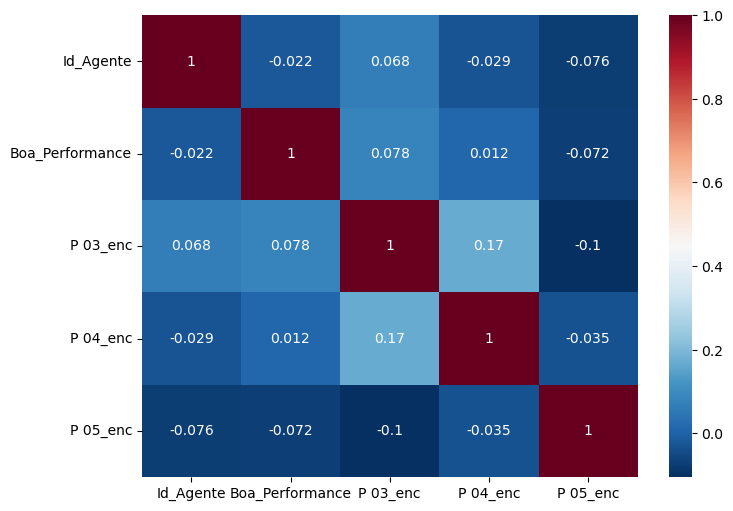

In [26]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(dados.corr(),
            cmap='RdBu_r',
            annot=True);

#### Relatório Profile Report

In [24]:
Relatorio = ProfileReport(dados2, title="Relatório Boa performance")
Relatorio

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

####  Analise IV

In [27]:
dados_iv = aed.analise_iv(dados2,'Boa_Performance')
dados_iv.get_lista_iv()

C:\Users\tania\Desktop\Git-Hub\People_Analytics\People_Analytics\aed.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Boa_Performance,IV
Variavel,
P 03: Qual a sua escolaridade?,0.12
P 02: Qual área de atendimento você atua ou atuou por mais tempo?,0.06
P 07: É bom trabalhar com meus colegas de trabalho.,0.06
P 11: Gosto de dizer o que penso.,0.04
P 10: Não gosto de situações que requerem que eu me comporte de forma controlada.,0.03
Id_Agente,0.03
P 05: Qual o tempo gasto no trajeto da sua residência até a empresa?,0.03
P 12: Gosto de fazer as coisas do meu jeito e não ligo para o que possam pensar.,0.02
P 04: Qual seu conhecimento em inglês?,0.01


In [33]:
dados_iv.get_bivariada(var_escolhida='P 03: Qual a sua escolaridade?')

==> "P 03: Qual a sua escolaridade?" tem IV de 0.12


Boa_Performance,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,P 03: Qual a sua escolaridade?,Ensino Médio completo,214,215,429,42.99,40.30,46.04,49.88,0.88,-0.13,0.01
1,P 03: Qual a sua escolaridade?,Ensino Superior concluído,113,62,175,17.54,21.28,13.28,64.57,1.60,0.47,0.04
2,P 03: Qual a sua escolaridade?,Ensino Superior cursando,91,106,197,19.74,17.14,22.70,46.19,0.76,-0.27,0.02
3,P 03: Qual a sua escolaridade?,Ensino Superior incompleto,95,75,170,17.03,17.89,16.06,55.88,1.11,0.10,0.00
4,P 03: Qual a sua escolaridade?,Pós Graduação concluído,3,7,10,1.00,0.56,1.50,30.00,0.37,-0.99,0.01
5,P 03: Qual a sua escolaridade?,Pós Graduação cursando,15,2,17,1.70,2.82,0.43,88.24,6.56,1.88,0.04


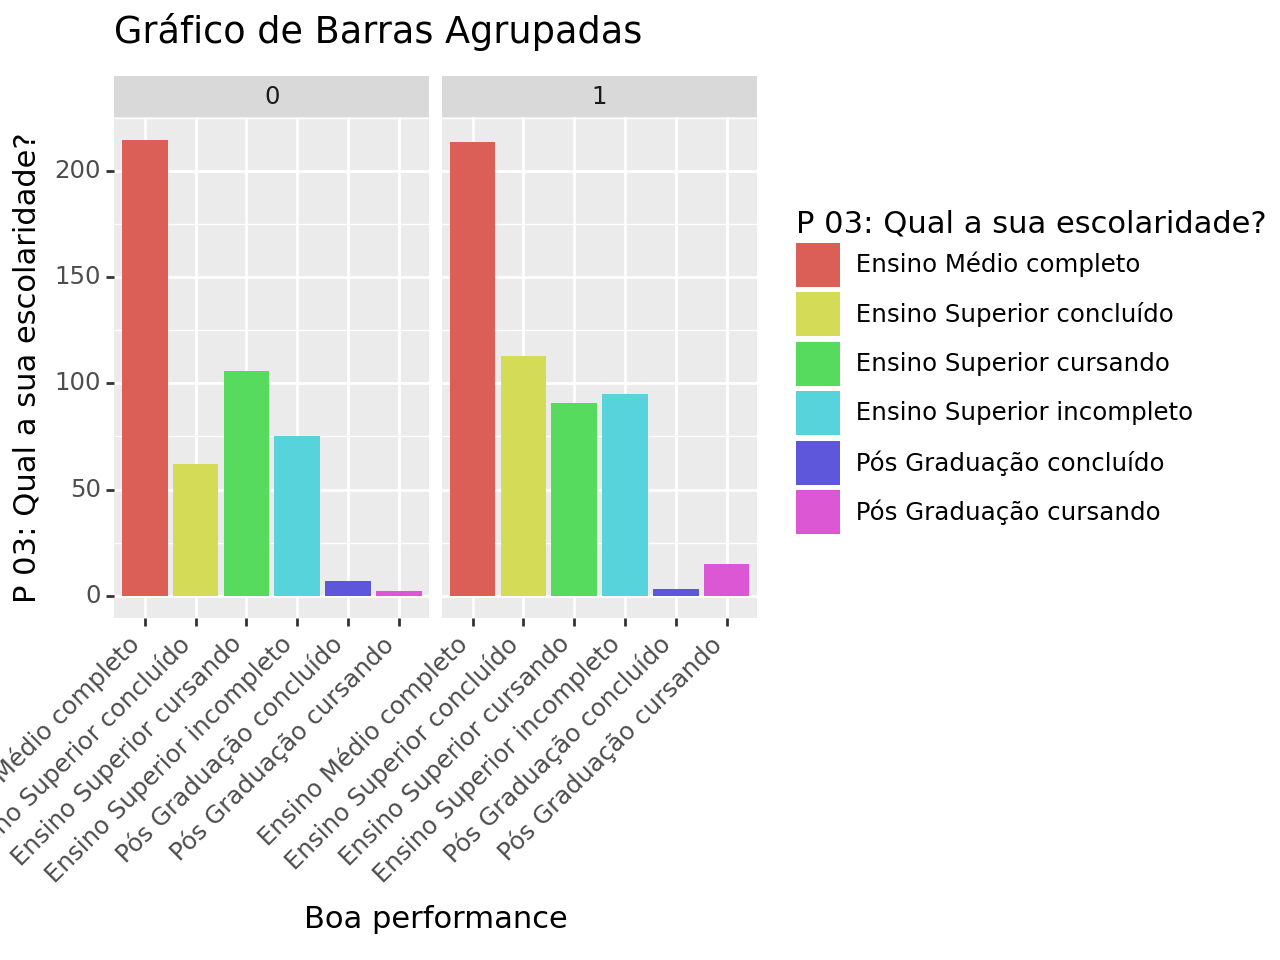

In [32]:
from plotnine import ggplot, aes, geom_bar, facet_wrap, scale_x_discrete, labs, theme
from textwrap import wrap
from plotnine.themes import element_text

grafico = (
    ggplot(dados2, aes(x='P 03: Qual a sua escolaridade?', fill='P 03: Qual a sua escolaridade?')) + 
    geom_bar(position='dodge') + 
    labs(title='Gráfico de Barras Agrupadas', x='Boa performance', y='P 03: Qual a sua escolaridade?') +
    facet_wrap('Boa_Performance') +
    theme(axis_text_x=element_text(angle=45, hjust=1))
)
# Mostrando o gráfico
print(grafico)

### Criação do modelo Logistico de classificação 

Para esse projeto foi optado pela criação de om modelo logístico, onde além de poder identificar as variáveis mais significativas para explicar a performance do colaborador como atribuir ao colaborador um score.

O modelo criado ficou um pouco extenso, com 37 coeficientes. Sendo esse um possível motivo pelo qual as métricas de verificação de qualidade do modelo deram relativamente baixas. Com uma acurácia de 57% e um f1 score de 62%.

Foi criada uma planilha em excel na pasta desse projeto com os dados dos scores pessoal para cada colaborador a fim de fazer futuras análises. Os primeiros colocados com melhor probabilidade de boa performance são os números "22, 33, 44, 69, 67".

In [35]:
dados.drop(columns=['Boa_Performance'], inplace=True)
dados = pd.get_dummies(dados, drop_first=True) 
   

In [10]:
pd.set_option('display.max_columns', None)
dados

,Id_Agente,P 03_enc,P 04_enc,P 05_enc,P 02_ Ativo de Vendas,P 02_ Backoffice,P 02_ Chat ou email,P 02_ Cobrança,P 02_ Multiskill,P 02_ Receptivo de Vendas,P 02_ Retenção,P 02_ Suporte Técnico,P 02_ Suporte Técnico com Vendas,P 06_ Sim,P 07_ Concordo totalmente,P 07_ Discordo,P 07_ Discordo totalmente,P 07_ Indiferente,P 08_ Concordo totalmente,P 08_ Discordo,P 08_ Discordo totalmente,P 08_ Indiferente,P 09_ Concordo totalmente,P 09_ Discordo,P 09_ Discordo totalmente,P 09_ Indiferente,P 10_ Concordo totalmente,P 10_ Discordo,P 10_ Discordo totalmente,P 10_ Indiferente,P 11_ Concordo totalmente,P 11_ Discordo,P 11_ Discordo totalmente,P 11_ Indiferente,P 12_ Concordo totalmente,P 12_ Discordo,P 12_ Discordo totalmente,P 12_ Indiferente
5,6,1,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
6,7,1,1,5,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
23,24,3,2,3,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
33,34,1,1,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
36,37,1,3,5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7225,7226,1,2,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0
7226,7227,4,2,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
7236,7237,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7238,7239,1,3,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [10]:

#Dividir o conjunto de dados em treinamento e teste
dados_train, dados_test, y_train, y_test = train_test_split(dados, y, test_size=0.3, random_state=42)

#Escalar os dados
scaler = StandardScaler()
dados_train_scaled = scaler.fit_transform(dados_train)
dados_test_scaled = scaler.transform(dados_test)

#Criar e treinar o modelo de regressão logística com o solver 'liblinear'
modelo = LogisticRegression(solver='liblinear', random_state=42)
modelo.fit(dados_train_scaled, y_train)

#Realizar previsões no conjunto de teste
y_pred = modelo.predict(dados_test_scaled)


In [12]:
coeficientes = modelo.coef_
print(coeficientes)
#print(modelo.fit.summary())


[[-0.06061298  0.17006417 -0.07002519 -0.04581444 -0.10820384  0.04127565
   0.00139255 -0.04428974 -0.0514554   0.00601487 -0.11823568 -0.14824226
  -0.01601874 -0.11441126  0.098159   -0.05245756  0.05993955 -0.22110127
  -0.08237138 -0.10178203 -0.00617928  0.04732008  0.12019031  0.03411886
  -0.0084902  -0.01698808 -0.04553881 -0.32629963 -0.15361151 -0.14366437
  -0.11931113 -0.12656125  0.07878076  0.06550737 -0.08319771 -0.10806825
   0.05391551 -0.12274338]]


In [13]:
# Obtendo os p-valores dos coeficientes
from scipy.stats import norm

# Calculando os p-valores
n = dados_train_scaled.shape[0]
p = dados_train_scaled.shape[1]
p_valores = 2 * (1 - norm.cdf(abs(coeficientes)))  # Utilizando a distribuição normal para cálculo do p-valor

# Imprimindo os coeficientes e seus respectivos p-valores
for i in range(p):
    print(f"Coeficiente {i}: {coeficientes[0][i]}, p-valor: {p_valores[0][i]}")

Coeficiente 0: -0.06061298367964191, p-valor: 0.9516674330567281
Coeficiente 1: 0.17006416547260117, p-valor: 0.8649596747573618
Coeficiente 2: -0.07002518554741606, p-valor: 0.9441736136700709
Coeficiente 3: -0.04581443897400637, p-valor: 0.9634581502583994
Coeficiente 4: -0.10820384007311401, p-valor: 0.9138339989052011
Coeficiente 5: 0.04127564836537418, p-valor: 0.9670761463113056
Coeficiente 6: 0.0013925472493661122, p-valor: 0.9988889084086447
Coeficiente 7: -0.044289744937538074, p-valor: 0.9646734460089967
Coeficiente 8: -0.051455396263901124, p-valor: 0.9589626433625156
Coeficiente 9: 0.006014871615203295, p-valor: 0.9952008557408198
Coeficiente 10: -0.11823568085665456, p-valor: 0.9058809189952683
Coeficiente 11: -0.14824225836480887, p-valor: 0.8821515828704405
Coeficiente 12: -0.016018743559661142, p-valor: 0.98721943841495
Coeficiente 13: -0.11441126053172983, p-valor: 0.9089117879980932
Coeficiente 14: 0.09815899952256649, p-valor: 0.921806038825757
Coeficiente 15: -0.052

#### NOTA:
  Acima temos todos o p-valores dos coeficientes muito não significativos. O que aconteceu?

#### Medidas de analise do modelo

In [14]:
#Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

# Calcular a precisão do modelo
precision = precision_score(y_test, y_pred)
print("Precisão do modelo:", precision)

# Calcular o recall (sensibilidade) do modelo
recall = recall_score(y_test, y_pred)
print("Recall do modelo:", recall)

# Calcular o F1-score do modelo
f1 = f1_score(y_test, y_pred)
print("F1-score do modelo:", f1)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusão:")

print(conf_matrix)

auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC:", auc_roc)

# Calcular o AUC-PR
auc_pr = average_precision_score(y_test, y_pred)
print("AUC-PR:", auc_pr)


Acurácia do modelo: 0.57
Precisão do modelo: 0.5891891891891892
Recall do modelo: 0.6728395061728395
F1-score do modelo: 0.6282420749279538
Matriz de confusão:
[[ 62  76]
 [ 53 109]]
AUC-ROC: 0.5610574342458401
AUC-PR: 0.5730964297630965


#### Modelo regressivo logistico

In [36]:
#Criando o modelo de regressão logística usando statsmodels para analise dos coeficientes 
import statsmodels.api as sm

modelo2 = sm.Logit(y, dados)
resultado = modelo2.fit()

# Imprimir a saída detalhada
print(resultado.summary())


Optimization terminated successfully.
         Current function value: 0.662418
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Boa_Performance   No. Observations:                  998
Model:                          Logit   Df Residuals:                      960
Method:                           MLE   Df Model:                           37
Date:                Mon, 11 Sep 2023   Pseudo R-squ.:                 0.04149
Time:                        16:19:37   Log-Likelihood:                -661.09
converged:                       True   LL-Null:                       -689.71
Covariance Type:            nonrobust   LLR p-value:                   0.01798
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Id_Agente                         6.165e-06   2.92e-05      0.21

####  Probabilidades de cada individuo ter boa performance (Score)

In [15]:
probabilidades_teste = modelo.predict_proba(dados_test)

dados_teste_com_prob = dados_test.copy()
dados_teste_com_prob['Prob_Boa_Performance'] = probabilidades_teste[:, 1]  # Probabilidades da classe 1 (Boa Performace)

# Formate as probabilidades para saírem com no máximo 5 casas decimais
dados_teste_com_prob['Prob_Boa_Performance'] = dados_teste_com_prob['Prob_Boa_Performance'].apply(lambda x: format(x, '.5f'))



      Id_Agente  P 03_enc  P 04_enc  P 05_enc  P 02_ Ativo de Vendas  \
4205       4206         1         2         3                  False   
6277       6278         6         2         1                  False   
1802       1803         1         2         4                  False   
2930       2931         2         2         3                   True   
5944       5945         4         2         3                  False   
...         ...       ...       ...       ...                    ...   
3036       3037         2         2         3                  False   
3856       3857         1         2         4                  False   
60           61         1         2         4                  False   
1118       1119         4         2         1                  False   
6371       6372         4         3         4                  False   

      P 02_ Backoffice  P 02_ Chat ou email  P 02_ Cobrança  P 02_ Multiskill  \
4205             False                False           

C:\Users\tania\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [16]:
dados_teste_com_prob["Prob_Boa_Performance"]

4205    0.00000
6277    0.00000
1802    0.00000
2930    0.00000
5944    0.00000
         ...   
3036    0.00000
3856    0.00000
60      0.01342
1118    0.00000
6371    0.00000
Name: Prob_Boa_Performance, Length: 300, dtype: object

#### NOTA:
Essas probabilidades estão certas?

In [17]:
# Converta a coluna 'Prob_Boa_Performance' para valores numéricos
dados_teste_com_prob['Prob_Boa_Performance'] = pd.to_numeric(dados_teste_com_prob['Prob_Boa_Performance'])

# Ordene o DataFrame pelas probabilidades de Boa_Performance em ordem decrescente
dados_teste_com_prob = dados_teste_com_prob.sort_values(by='Prob_Boa_Performance', ascending=False)

dados_teste_com_prob.to_csv("dados_teste_com_prob.csv ")



      Id_Agente  P 03_enc  P 04_enc  P 05_enc  P 02_ Ativo de Vendas  \
23           24         3         2         3                      0   
33           34         1         1         3                      0   
44           45         2         2         2                      0   
69           70         3         3         2                      0   
67           68         3         2         3                      0   
...         ...       ...       ...       ...                    ...   
4021       4022         4         2         3                      0   
5241       5242         2         2         3                      0   
6352       6353         2         2         3                      0   
5341       5342         5         3         4                      0   
6371       6372         4         3         4                      0   

      P 02_ Backoffice  P 02_ Chat ou email  P 02_ Cobrança  P 02_ Multiskill  \
23                   0                    0           

### CONCLUSÃO

A partir das analises a cima podemos observar que o perfil de colaborador que possue um bom desempenho é um colaborador com ensino superior completo, que ja trabalhou ou trabalha com suporte tecnico, que não teve contato com contact-center e que gosta de trabalhar com colegas de trabalho.

Dito isso, acredito que estas sejam as caracteristicas pela qual o time de RH deve olhar para priorizar uma boa contratação.